In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from matplotlib import pyplot

In [2]:
# Load scrapped CSV files

data1 = pd.read_csv('SV1663.csv')
data2 = pd.read_csv('SV2942.csv')
data3 = pd.read_csv('SV5092.csv')
data4 = pd.read_csv('SV6176.csv') 
data5 = pd.read_csv('SV7401.csv')
data6 = pd.read_csv('SV13537.csv')
data7 = pd.read_csv('StdV499.csv')

In [3]:
#concatenate all df
#data = data7
data = pd.concat([data1, data2, data3, data4, data5, data6, data7])
data.shape

<ipython-input-3-df4a895dc163>:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  data = pd.concat([data1, data2, data3, data4, data5, data6, data7])


(31989, 15)

In [4]:
# Clean data

# Drop not used columns
data.reset_index(inplace = True)
data.drop(['Classe do veículo', 'Valor Fixo', 'Matrícula', 'Unnamed: 0','index'], axis = 1, inplace = True)

# Drop New Cars and public transport bus (1 vehicle)
data = data [data['Condição'] == 'Usados']
data = data [data['Segmento'] != 'Transportes']

# Column Potência convert to int
data['Potência'] = [re.sub('\D+','', str(el)) for el in data['Potência']]
data['Potência'] = data['Potência'].astype(int)
data = data[data['Potência'] > 10]

# Column km convert to int & remove very low values not compatible with used cars
data['Quilómetros'] = [int(re.sub('\D+','', el)) for el in data['Quilómetros']]
data = data[data['Quilómetros'] > 100]
data.shape

#NaN droping for caixa
data.dropna(subset=['Tipo de Caixa'], inplace=True)
data

,Ano de Registo,Combustível,Condição,ID,Marca,Origem,Potência,Quilómetros,Segmento,Série,Tipo de Caixa
0,2013,Gasolina,Usados,8073675579,Cadillac,NaN,409,47200,SUV / TT,NaN,Automática
1,2012,Diesel,Usados,8069978966,Porsche,NaN,250,113000,Sedan,NaN,Automática
2,2013,Diesel,Usados,8068316065,Citroën,NaN,115,104000,Citadino,NaN,Manual
3,2018,Diesel,Usados,8074629399,BMW,NaN,190,35000,Sedan,Série 5,Automática
4,2018,Diesel,Usados,8075510964,Mercedes-Benz,Nacional,190,78453,Sedan,Classe E,Automática
...,...,...,...,...,...,...,...,...,...,...,...
31983,2017,Diesel,Usados,8047877369,MINI,Nacional,116,10000,Citadino,NaN,Automática
31985,2016,Diesel,Usados,8074037998,Mercedes-Benz,Nacional,258,52000,Sedan,Classe E,Automática
31986,2018,Diesel,Usados,8074969766,BMW,NaN,190,22373,Carrinha,Série 3,Automática
31987,2018,Diesel,Usados,8041049841,BMW,Nacional,190,10000,Sedan,Série 5,Automática


In [5]:
#drop duplicate entries
#data.drop_duplicates(inplace = True)
duplicated_IDs = [8074761416,8073913822,8072480648,8075710174,8074971964,8075744290]
data.drop([442, 29824, 1911],axis = 0, inplace = True)
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [6]:
data.to_csv('Final300.csv')
data

,Ano de Registo,Combustível,Condição,ID,Marca,Origem,Potência,Quilómetros,Segmento,Série,Tipo de Caixa
0,2013,Gasolina,Usados,8073675579,Cadillac,NaN,409,47200,SUV / TT,NaN,Automática
1,2012,Diesel,Usados,8069978966,Porsche,NaN,250,113000,Sedan,NaN,Automática
2,2013,Diesel,Usados,8068316065,Citroën,NaN,115,104000,Citadino,NaN,Manual
3,2018,Diesel,Usados,8074629399,BMW,NaN,190,35000,Sedan,Série 5,Automática
4,2018,Diesel,Usados,8075510964,Mercedes-Benz,Nacional,190,78453,Sedan,Classe E,Automática
...,...,...,...,...,...,...,...,...,...,...,...
28596,2017,Diesel,Usados,8047877369,MINI,Nacional,116,10000,Citadino,NaN,Automática
28597,2016,Diesel,Usados,8074037998,Mercedes-Benz,Nacional,258,52000,Sedan,Classe E,Automática
28598,2018,Diesel,Usados,8074969766,BMW,NaN,190,22373,Carrinha,Série 3,Automática
28599,2018,Diesel,Usados,8041049841,BMW,Nacional,190,10000,Sedan,Série 5,Automática


In [7]:
#drop duplicate entries
data.drop_duplicates(inplace = True)

In [8]:
data

,Ano de Registo,Combustível,Condição,ID,Marca,Origem,Potência,Quilómetros,Segmento,Série,Tipo de Caixa
0,2013,Gasolina,Usados,8073675579,Cadillac,NaN,409,47200,SUV / TT,NaN,Automática
1,2012,Diesel,Usados,8069978966,Porsche,NaN,250,113000,Sedan,NaN,Automática
2,2013,Diesel,Usados,8068316065,Citroën,NaN,115,104000,Citadino,NaN,Manual
3,2018,Diesel,Usados,8074629399,BMW,NaN,190,35000,Sedan,Série 5,Automática
4,2018,Diesel,Usados,8075510964,Mercedes-Benz,Nacional,190,78453,Sedan,Classe E,Automática
...,...,...,...,...,...,...,...,...,...,...,...
28595,2018,Diesel,Usados,8070662106,BMW,Nacional,190,22000,Cabrio,Série 2,Automática
28596,2017,Diesel,Usados,8047877369,MINI,Nacional,116,10000,Citadino,NaN,Automática
28598,2018,Diesel,Usados,8074969766,BMW,NaN,190,22373,Carrinha,Série 3,Automática
28599,2018,Diesel,Usados,8041049841,BMW,Nacional,190,10000,Sedan,Série 5,Automática


In [9]:
data.columns

Index(['Ano de Registo', 'Combustível', 'Condição', 'ID', 'Marca', 'Origem',
       'Potência', 'Quilómetros', 'Segmento', 'Série', 'Tipo de Caixa'],
      dtype='object')

In [10]:
columns_mapping ={'Ano de Registo':'year', 'Segmento':'vehicle_type', 'Tipo de Caixa': 'transmission', 'Potência':'horsepower', 'Quilómetros':'km', 'Combustível':'fuel_type', 'Marca':'brand'}
transmission_dic = {'Manual':'manual', 'Automática': 'automatic'}
fuel_dict = {"Eléctrico": "electric", "Gasolina": "gas", "Diesel": "diesel", "lpg": "GPL", 'Híbrido (Gasolina)': 'hybrid', 'Híbrido (Diesel)': 'hybrid'}
vehicle_type_dict = {'Cabrio' : "cabrio", 'Coupé' : "coupé", 'Citadino' : 'small_car', 'Carrinha' : 'sports_tourism_van', 'Sedan' : 'large_family_car', 'SUV / TT' : 'suv', 'Utilitário' : 'small_car', 'Pequeno citadino' : 'small_car','Monovolume' : 'suv' }

In [11]:
data.drop(['Série', 'Origem', 'Condição'], axis = 1, inplace = True)
data.rename(columns = columns_mapping, inplace = True)
data.replace({"transmission": transmission_dic}, inplace = True)
data.replace({"fuel_type": fuel_dict}, inplace = True)
data.replace({"vehicle_type": vehicle_type_dict}, inplace = True)
data

,year,fuel_type,ID,brand,horsepower,km,vehicle_type,transmission
0,2013,gas,8073675579,Cadillac,409,47200,suv,automatic
1,2012,diesel,8069978966,Porsche,250,113000,large_family_car,automatic
2,2013,diesel,8068316065,Citroën,115,104000,small_car,manual
3,2018,diesel,8074629399,BMW,190,35000,large_family_car,automatic
4,2018,diesel,8075510964,Mercedes-Benz,190,78453,large_family_car,automatic
...,...,...,...,...,...,...,...,...
28595,2018,diesel,8070662106,BMW,190,22000,cabrio,automatic
28596,2017,diesel,8047877369,MINI,116,10000,small_car,automatic
28598,2018,diesel,8074969766,BMW,190,22373,sports_tourism_van,automatic
28599,2018,diesel,8041049841,BMW,190,10000,large_family_car,automatic


In [12]:
data['vehicle_type'].unique()

array(['suv', 'large_family_car', 'small_car', 'sports_tourism_van',
       'coupé', 'cabrio'], dtype=object)

In [13]:
cols = list(data.columns)
cols = [cols[2], cols[6], cols[0], cols[7], cols[4], cols[5], cols[1], cols[3]]
data = data[cols]
data

,ID,vehicle_type,year,transmission,horsepower,km,fuel_type,brand
0,8073675579,suv,2013,automatic,409,47200,gas,Cadillac
1,8069978966,large_family_car,2012,automatic,250,113000,diesel,Porsche
2,8068316065,small_car,2013,manual,115,104000,diesel,Citroën
3,8074629399,large_family_car,2018,automatic,190,35000,diesel,BMW
4,8075510964,large_family_car,2018,automatic,190,78453,diesel,Mercedes-Benz
...,...,...,...,...,...,...,...,...
28595,8070662106,cabrio,2018,automatic,190,22000,diesel,BMW
28596,8047877369,small_car,2017,automatic,116,10000,diesel,MINI
28598,8074969766,sports_tourism_van,2018,automatic,190,22373,diesel,BMW
28599,8041049841,large_family_car,2018,automatic,190,10000,diesel,BMW


In [14]:
prices = pd.read_csv('prices_real.csv')
prices.drop_duplicates(inplace= True)

prices.rename({'0' :'ID', '3':'price'}, axis = 1,inplace = True)
prices.drop('Unnamed: 0', axis = 1, inplace=True)
prices['ID'].unique()

full = data.merge(prices, on ='ID')
cols = list(full.columns)
cols = [cols[-1]] + cols[0:8]
full = full[cols]
full

,price,ID,vehicle_type,year,transmission,horsepower,km,fuel_type,brand
0,19 900,8075510964,large_family_car,2018,automatic,190,78453,diesel,Mercedes-Benz
1,9 150,8073871562,suv,2015,automatic,218,103322,diesel,BMW
2,24 990,8072810762,sports_tourism_van,2008,manual,110,190000,diesel,MINI
3,16 499,8074632564,sports_tourism_van,2018,manual,95,39854,diesel,Fiat
4,22 990,8073285820,small_car,2012,manual,105,53500,diesel,Fiat
...,...,...,...,...,...,...,...,...,...
12775,31 000,8074081544,small_car,2019,manual,82,13000,gas,Peugeot
12776,7 000,8074898322,large_family_car,1997,manual,95,252400,diesel,Mercedes-Benz
12777,25 999,8075004062,sports_tourism_van,2011,manual,105,230000,diesel,VW
12778,18 000,8068451401,small_car,2009,automatic,52,125000,gas,Smart


In [15]:
#full.drop('ID', axis = 1, inplace=True)
full['price'] = [int(re.sub(' ','',el)) for el in full['price']]
full

,price,ID,vehicle_type,year,transmission,horsepower,km,fuel_type,brand
0,19900,8075510964,large_family_car,2018,automatic,190,78453,diesel,Mercedes-Benz
1,9150,8073871562,suv,2015,automatic,218,103322,diesel,BMW
2,24990,8072810762,sports_tourism_van,2008,manual,110,190000,diesel,MINI
3,16499,8074632564,sports_tourism_van,2018,manual,95,39854,diesel,Fiat
4,22990,8073285820,small_car,2012,manual,105,53500,diesel,Fiat
...,...,...,...,...,...,...,...,...,...
12775,31000,8074081544,small_car,2019,manual,82,13000,gas,Peugeot
12776,7000,8074898322,large_family_car,1997,manual,95,252400,diesel,Mercedes-Benz
12777,25999,8075004062,sports_tourism_van,2011,manual,105,230000,diesel,VW
12778,18000,8068451401,small_car,2009,automatic,52,125000,gas,Smart


In [16]:
full.to_csv('Final_SV.csv')

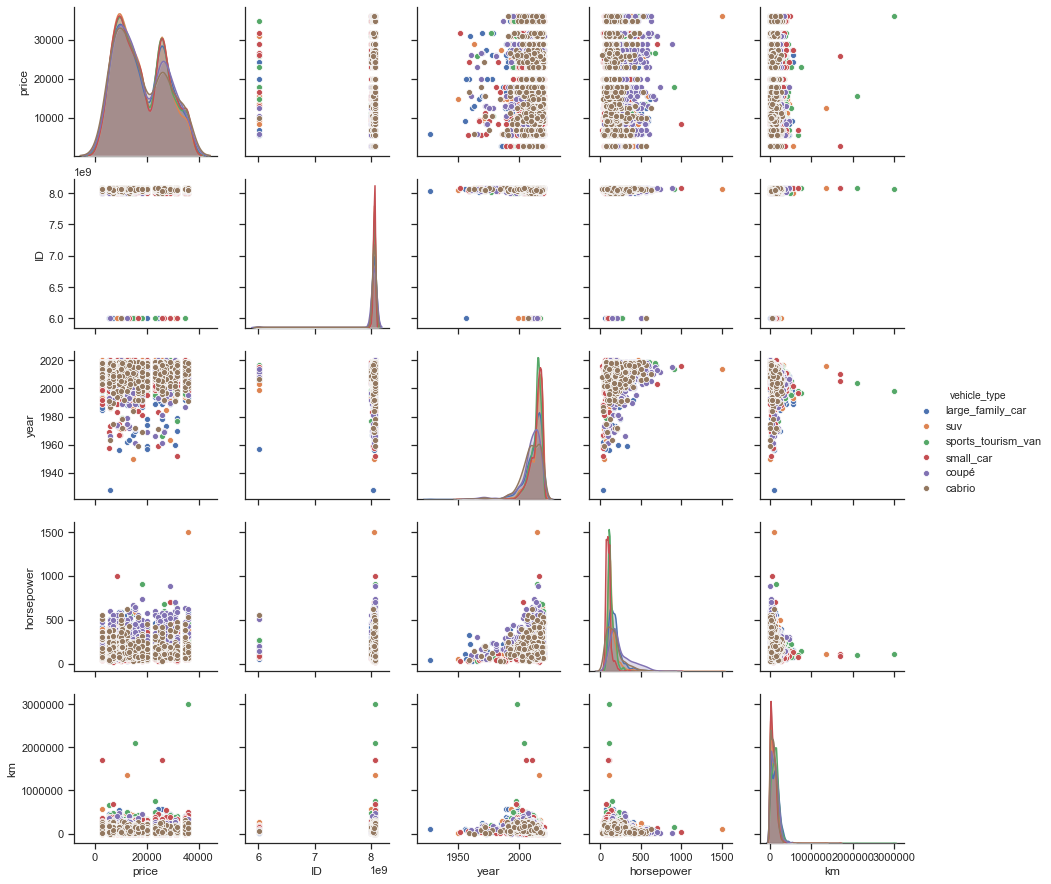

In [17]:
 g = sns.pairplot(full, hue = 'vehicle_type')

In [18]:
full.to_csv('Full_SV.csv')